In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""Pharmahacks - Phyla Challenge #2"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn

In [2]:
# Import dataset
df = pd.read_csv('challenge_1_gut_microbiome_data.csv', index_col=0)
print(df.head(5))

          Bacteria-1  Bacteria-2  Bacteria-3  Bacteria-4  Bacteria-5  \
Sample-1         0.0         0.0         0.0         0.0         0.0   
Sample-2         0.0         0.0         0.0         0.0         0.0   
Sample-3         0.0        10.0         0.0         0.0         0.0   
Sample-4         0.0        17.0         0.0         0.0         0.0   
Sample-5         0.0         8.0         0.0         0.0         0.0   

          Bacteria-6  Bacteria-7  Bacteria-8  Bacteria-9  Bacteria-10  ...  \
Sample-1         0.0         0.0         0.0         0.0          0.0  ...   
Sample-2         0.0         0.0         0.0         0.0          0.0  ...   
Sample-3         0.0         0.0         0.0         0.0          0.0  ...   
Sample-4         0.0         0.0         0.0         0.0          0.0  ...   
Sample-5         0.0         0.0         0.0         0.0          0.0  ...   

          Bacteria-1086  Bacteria-1087  Bacteria-1088  Bacteria-1089  \
Sample-1            0.0   

In [3]:
# Features
X = df.filter(regex=("Bacteria-*"))
# Labels
Y = df['disease']

In [4]:
# 25% of the dataset is used for testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0)

In [5]:
# Random Forest Classifier - Training
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
# Predictions
Y_pred = clf.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

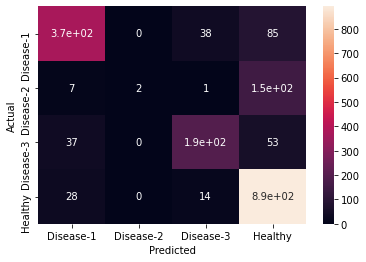

In [6]:
# Produces the confusion matrix' heatmap
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=[
                               'Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [7]:
# Performance
print('F1 Score - Micro: ', metrics.accuracy_score(Y_test, Y_pred))
print('F1 Score - Macro: ', metrics.f1_score(Y_test, Y_pred, average='macro'))
print('F1 Score - Weighted: ', metrics.f1_score(Y_test, Y_pred, average='weighted'))
print('Cohen’s kappa score: ', metrics.cohen_kappa_score(Y_test, Y_pred))

F1 Score - Micro:  0.780331373597007
F1 Score - Macro:  0.5981815091402464
F1 Score - Weighted:  0.7443181899051569
Cohen’s kappa score:  0.6355790715803891


In [8]:
# EXAMPLE: Prediction

# Sample 3602 - Disease-1
sample = X.loc[["Sample-3602"]]
sample_predict = clf.predict(sample)
sample_predict_proba = clf.predict_proba(sample)

print(sample_predict)
print(sample_predict_proba)

['Disease-1']
[[0.76 0.   0.09 0.15]]
